In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner

plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

from model_selection import Evidence_model_selection as EMS

# Experiment: 2 term truth with 1 moment
### Can be fit by a 1 term model

In [2]:
# Set up the experiment
nTruth = 2
nMoment = 1
param_Truth = [ 2.0,    1.5,   0.9,  0.1]

In [3]:
# Initialize the model selection object
Ex2 = EMS(nTruth,nMoment,param_Truth)

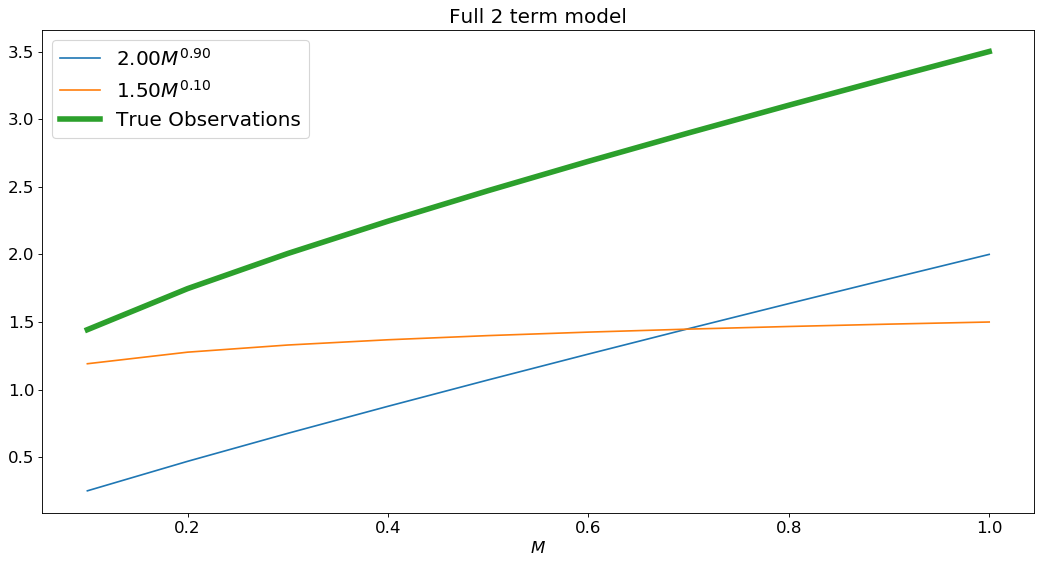

In [4]:
# Run a synthetic experiment and generate data, the data becomes an attribute of the object
Ex2.get_data()
# Plot the data
Ex2.plot_truth()

In [5]:
# Run model selection

# Models indicates how many models are being compared, the integer references the number of terms in the model
# dlnZ_tol is the tolerance for estimated the log evidence using thermodynamic integration
# MCMC_Steps is the number of steps in each MCMC chain

Ex2.model_selection(Models=[1, 2, 3], dlnZ_tol=1, MCMC_Steps=2000)

Model 1  has error > tolerance, increasing the number of temperatures to  40
      Current log evidence and estimation error: lnZ =  -4.0644760602174435 , dlnZ =  1.3767226971940394

Results:
Model 1 with  lnZ =  -4.963853346127247 , dlnZ =  0.8973687673255029
Model 2 with  lnZ =  -6.872461068270352 , dlnZ =  0.8205810223435508
Model 3 with  lnZ =  -7.8512988911343715 , dlnZ =  0.6967405419611694
The selected model is Model 1


In [6]:
# Run a long MCMC simulation for the selected model to view the parameter space

Ex2.ntemps = 10 # Reset the number of temperatures used to make the long MCMC simulation shorter

sampler = Ex2.run_MCMC(nTerms=Ex2.selected_model,MCMC_Steps = int(1E4))

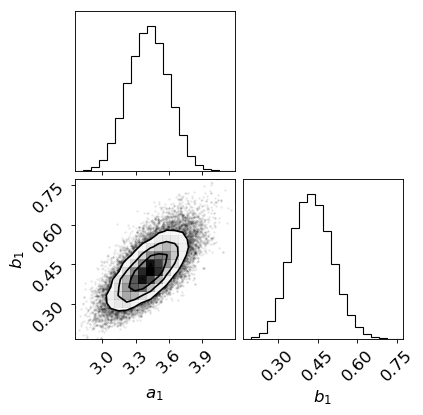

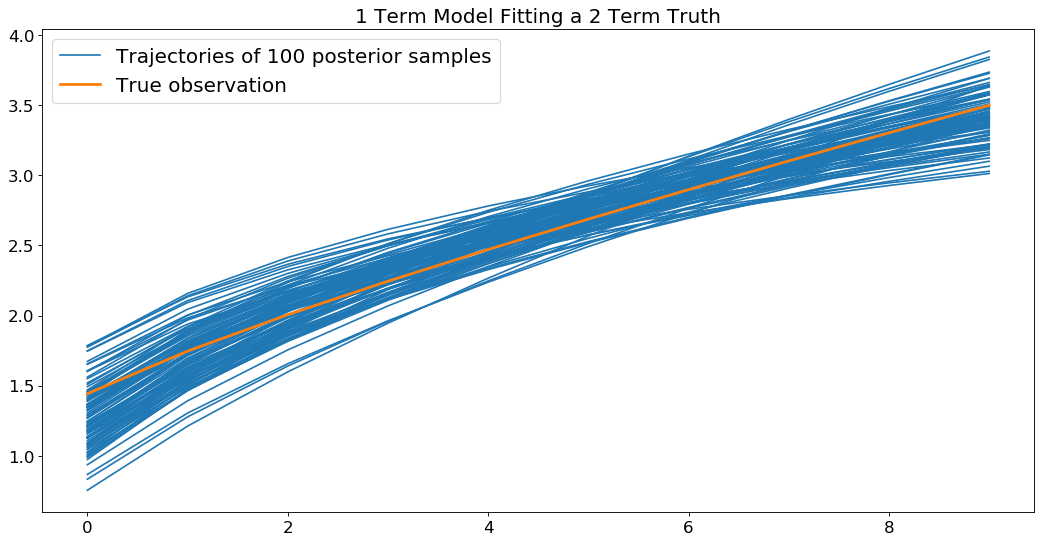

In [7]:
# Plot the results
Ex2.plot_sampler(sampler,nTerms=Ex2.selected_model)